In [91]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

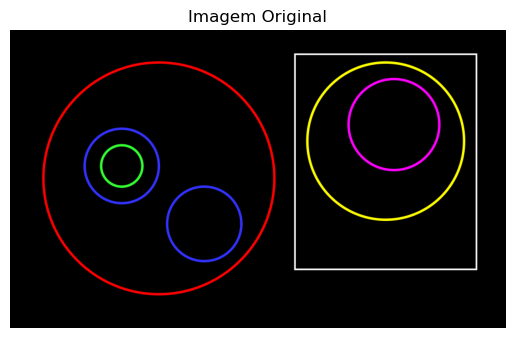

In [100]:
img = cv.imread("../src/hierarchy.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (0, 0), fx=0.5, fy=0.5)

plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

In [101]:
# Função para criar uma janela de trackbars
def empty(a):
    pass

# +==+==+==+==+==+ Color Detection +==+==+==+==+==+ //
hMin = 0
sMin = 0
vMin = 0
hMax = 179
sMax = 255
vMax = 255

# Converte a imagem para o espaço de cor HSV
imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# Cria a janela com trackbars
cv.namedWindow("Trackbars", cv.WINDOW_NORMAL)
cv.createTrackbar("Hue Min", "Trackbars", hMin, 179, empty)
cv.createTrackbar("Hue Max", "Trackbars", hMax, 179, empty)
cv.createTrackbar("Sat Min", "Trackbars", sMin, 255, empty)
cv.createTrackbar("Sat Max", "Trackbars", sMax, 255, empty)
cv.createTrackbar("Val Min", "Trackbars", vMin, 255, empty)
cv.createTrackbar("Val Max", "Trackbars", vMax, 255, empty)

while True:
    # Atualiza os valores dos trackbars
    hMin = cv.getTrackbarPos("Hue Min", "Trackbars")
    hMax = cv.getTrackbarPos("Hue Max", "Trackbars")
    sMin = cv.getTrackbarPos("Sat Min", "Trackbars")
    sMax = cv.getTrackbarPos("Sat Max", "Trackbars")
    vMin = cv.getTrackbarPos("Val Min", "Trackbars")
    vMax = cv.getTrackbarPos("Val Max", "Trackbars")

    # Define os limites inferior e superior da máscara
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Cria a máscara que destaca as cores dentro do intervalo definido
    mask = cv.inRange(imgHSV, lower, upper)

    # Mostra as imagens: original, HSV e a máscara
    cv.imshow("Image", img)
    cv.imshow("Image HSV", imgHSV)
    cv.imshow("Image Mask", mask)

    # Saída do loop com tecla 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Fecha as janelas
cv.destroyAllWindows()


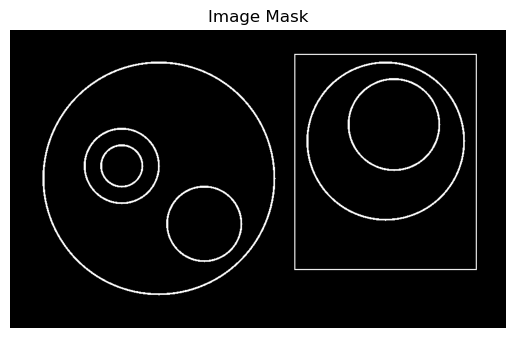

In [102]:
lower = np.array([0, 0, 255])
upper = np.array([179, 255, 255])
mask = cv.inRange(imgHSV, lower, upper)


plt.imshow(mask, cmap='gray')
plt.title('Image Mask')
plt.axis('off')
plt.show()

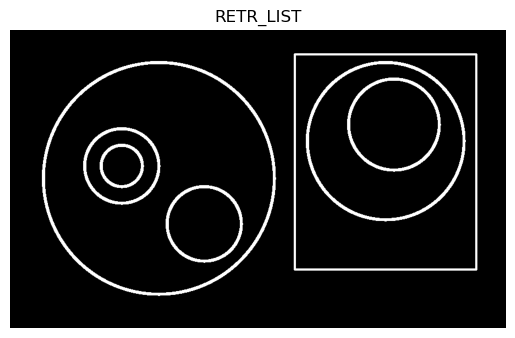

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [-1 12 -1 -1]]]


In [108]:
img_2 = mask.copy()
img_preta = np.zeros_like(img_2)
contours, hierarchy = cv.findContours(img_2 ,cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img_preta, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contours, cmap='gray')
plt.title('RETR_LIST')
plt.axis('off')
plt.show()
print(hierarchy)

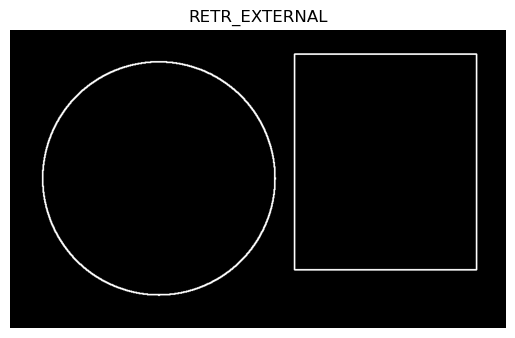

[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]


In [105]:
img_2 = mask.copy()
img_preta = np.zeros_like(img_2)
contours, hierarchy = cv.findContours(img_2 ,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img_preta, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contours, cmap='gray')
plt.title('RETR_EXTERNAL')
plt.axis('off')
plt.show()
print(hierarchy)

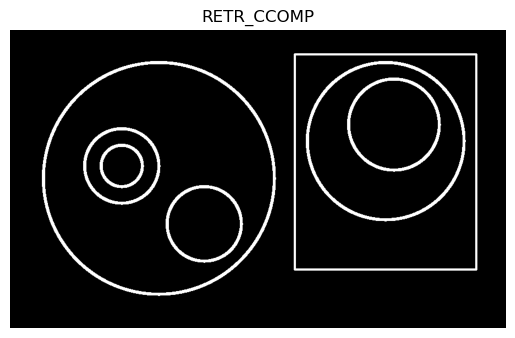

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 8  4  7 -1]
  [-1 -1 -1  6]
  [10  6  9 -1]
  [-1 -1 -1  8]
  [12  8 11 -1]
  [-1 -1 -1 10]
  [-1 10 13 -1]
  [-1 -1 -1 12]]]


In [106]:
img_2 = mask.copy()
img_preta = np.zeros_like(img_2)
contours, hierarchy = cv.findContours(img_2 ,cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img_preta, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contours, cmap='gray')
plt.title('RETR_CCOMP')
plt.axis('off')
plt.show()
print(hierarchy)

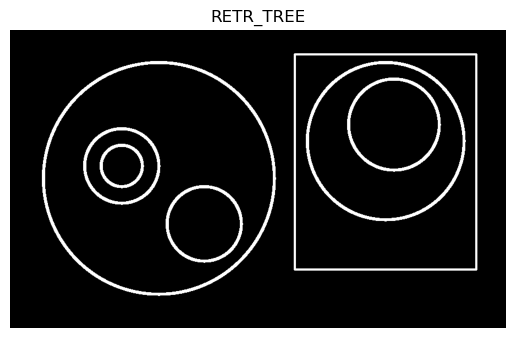

[[[ 8 -1  1 -1]
  [-1 -1  2  0]
  [ 4 -1  3  1]
  [-1 -1 -1  2]
  [-1  2  5  1]
  [-1 -1  6  4]
  [-1 -1  7  5]
  [-1 -1 -1  6]
  [-1  0  9 -1]
  [-1 -1 10  8]
  [-1 -1 11  9]
  [-1 -1 12 10]
  [-1 -1 13 11]
  [-1 -1 -1 12]]]


In [107]:
img_2 = mask.copy()
img_preta = np.zeros_like(img_2)
contours, hierarchy = cv.findContours(img_2 ,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
img_contours = cv.drawContours(img_preta, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contours, cmap='gray')
plt.title('RETR_TREE')
plt.axis('off')
plt.show()
print(hierarchy)